# kNN

Noa Pereira Prada Schnor



### Dataset Overview:
#### Name: Estimation of Obesity Levels Based On Eating Habits and Physical Condition
#### Purpose:
This dataset is primarily used to estimate obesity levels among individuals from Mexico, Peru, and Colombia by analysing their eating habits and physical activity.
#### Data Generation:
- **77%** of the data was generated **synthetically** using the **Weka** tool and the **SMOTE** filter, while **23%** of the data was **collected directly** from users via a **web platform**.
    
#### Target Variable:
- **Name:** NObeyesdad
- **Description:** Ordinal variable created based on the **Body Mass Index (BMI)**. The dataset classifies individuals into 7 NObeyesdad categories, from Insufficient Weight to Obesity Type III.

#### Feature Variables:
The feature variables are related to eating habits attributes, physical activity attributes and additional attributes, such as gender and age. All the attributes are listed below.

##### Eating Habits Attributes:
The following attributes are related to the **eating habits** of individuals:
- **Frequent consumption of high-caloric food (FAVC)** - binary: Yes/No
- **Frequency of consumption of vegetables (FCVC)** - categorical: Never, Sometimes, Always
- **Number of main meals (NCP)** - categorical: Between 1 and 2, Three, More than three
- **Consumption of food between meals (CAEC)** -categorical: No, Sometimes, Frequently, Always
- **Consumption of water daily (CH20)** -categorical: Less than a litre, Between 1 and 2 L, More than 2 L
- **Consumption of alcohol (CALC)**

##### Physical Activity Attributes:
The attributes related to the **physical activity** of individuals include:
- **Calories consumption monitoring (SCC)** - binary: Yes/No
- **Physical activity frequency (FAF)** - categorical: I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 days
- **Time using technology devices (TUE)** - categorical: 0–2 hours, 3–5 hours, More than 5 hours
- **Transportation used (MTRANS)** - categorical: Automobile, Motorbike, Bike, Public Transportation, Walking


##### Additional Attributes:
Other variables obtained in the dataset are:
- **Gender** - binary: Male/Female
- **Age** - numerical, in years
- **Height** - numerical, in metres
- **Weight** - numerical, in kilograms
- **Smoke(SMOKE)** - binary: yes/no
- **Family History of Obesity(family_history_with_overweight)** - binary: Yes/No


#### Additional Resources:
For detailed information and studies related to this dataset, please refer to the following sources:
- [UCI Machine Learning Repository: Estimation of Obesity Levels Based On Eating Habits and Physical Condition Dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)
- [Dataset for Estimation of Obesity Levels Based on Eating Habits and Physical Condition](https://www.semanticscholar.org/paper/Dataset-for-estimation-of-obesity-levels-based-on-Palechor-Manotas/35b40bacd2ffa9370885b7a3004d88995fd1d011)
- The full paper can be accessed from [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6710633/).

## Import Libraries

In [5]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns

## Load Data and Data Exploration

In [7]:
df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv") #read the csv file

In [8]:
#Check the column names
print(df.columns) 

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


- 17 columns: 16 features + 1 target variable

In [10]:
#Check the number of rows, mean, median, and percentiles of the numerical columns
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

- No missing values: 2111 instances
- Weight and age mean are larger than other numerical features (very different range of values). This suggests we should scale the features before applying kNN

In [12]:
#get the number of counts for each of the values of the target column
print(df.NObeyesdad.value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


- The distribution dof NObeyesdad does not seems to differ between the categories

In [14]:
#check the first 5 rows of the df
print(df.head)

<bound method NDFrame.head of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC

In [15]:
#MCheck the column data type, number of instance and if there is null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

- Numerical and non numerical features
- Non numerical target variable

In [17]:
#Check the distinct values of the non-numerical columns
columns = ['Gender', 'family_history_with_overweight', 'SMOKE', 'FAVC', 'SCC', 'CALC', 'CAEC', 'MTRANS']
for col in columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in Gender: ['Female' 'Male']
Unique values in family_history_with_overweight: ['yes' 'no']
Unique values in SMOKE: ['no' 'yes']
Unique values in FAVC: ['no' 'yes']
Unique values in SCC: ['no' 'yes']
Unique values in CALC: ['no' 'Sometimes' 'Frequently' 'Always']
Unique values in CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
Unique values in MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


- The features are going to be encoded based on their unique values

In [19]:
#Encoding the features

# Define mappings
frequency_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
binary_mapping = {'no': 0, 'yes': 1}

# Columns to map
frequency_columns = ['CALC', 'CAEC']
binary_columns = ['family_history_with_overweight', 'SMOKE', 'FAVC', 'SCC']

# Apply mappings to frequency columns
for col in frequency_columns:
    # Convert column to lowercase string and map
    df[col] = df[col].astype(str).map(frequency_mapping)
    
    # Check for any missing values introduced by the mapping
    print(f"Column {col} missing values after mapping:", df[col].isna().sum())

# Apply mappings to binary columns
for col in binary_columns:
    # Convert column to lowercase string and map
    df[col] = df[col].astype(str).map(binary_mapping)
    
    # Check for any missing values introduced by the mapping
    print(f"Column {col} missing values after mapping:", df[col].isna().sum())

# Combine transformed columns
transformed_columns = frequency_columns + binary_columns


# One-hot encode 'MTRANS' and 'Gender'
df = pd.get_dummies(df, columns=['MTRANS', 'Gender'], prefix=['MTRANS', 'Gender'])

# Check the first 5 rows of the transformed df
df.head()

Column CALC missing values after mapping: 0
Column CAEC missing values after mapping: 0
Column family_history_with_overweight missing values after mapping: 0
Column SMOKE missing values after mapping: 0
Column FAVC missing values after mapping: 0
Column SCC missing values after mapping: 0


,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,...,1.0,0,Normal_Weight,False,False,False,True,False,True,False
1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,...,0.0,1,Normal_Weight,False,False,False,True,False,True,False
2,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,...,1.0,2,Normal_Weight,False,False,False,True,False,False,True
3,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,...,0.0,2,Overweight_Level_I,False,False,False,False,True,False,True
4,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,...,0.0,1,Overweight_Level_II,False,False,False,True,False,False,True


In [20]:
#Check the distinct values of the hot encoded columns 
for col in transformed_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in CALC: [0 1 2 3]
Unique values in CAEC: [1 2 3 0]
Unique values in family_history_with_overweight: [1 0]
Unique values in SMOKE: [0 1]
Unique values in FAVC: [0 1]
Unique values in SCC: [0 1]


- It looks like all the features were encoded

In [22]:
#Check the data again with the encoded features
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,...,1.0,0,Normal_Weight,False,False,False,True,False,True,False
1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,...,0.0,1,Normal_Weight,False,False,False,True,False,True,False
2,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,...,1.0,2,Normal_Weight,False,False,False,True,False,False,True
3,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,...,0.0,2,Overweight_Level_I,False,False,False,False,True,False,True
4,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,...,0.0,1,Overweight_Level_II,False,False,False,True,False,False,True


## Modeling

In [24]:
# Defining the features (excluding the target column)
X = df.drop(['NObeyesdad'], axis=1)  # Dropping the target variable

In [25]:
#Defining the target variable (non encoded target variable)
y = df.NObeyesdad #target variable IMC category

In [26]:
#Create a non encoded version of the y (target variable)

# Define the order for the categories
target_order = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Map the target to integers
df['NObeyesdad_encoded'] = df['NObeyesdad'].map(target_order)

#Create a encoded X and y
X_df_encoded = df.drop(['NObeyesdad', 'NObeyesdad_encoded'], axis=1)  # Drop original and encoded target from features
y_df_encoded = df['NObeyesdad_encoded']  # Use encoded target

#Split the train and test data using encoded target variable
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_df_encoded, y_df_encoded, test_size=0.2, random_state=1)

In [27]:
#split into training and test data. test set is set to 20% of the entire data (non encoded y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1) 

In [28]:
#create the kneighbors classifier object for the non encoded y
clf = KNeighborsClassifier()

#create the kneighbors classifier object for the encoded y
clf2 = KNeighborsClassifier()

In [29]:
#fit the training data (80% of the data) non encoded variable
clf.fit(X_train,y_train)

#fit the training data (80% of the data) non encoded variable
clf2.fit(X_train_encoded,y_train_encoded)

KNeighborsClassifier()

In [30]:
#fit the training data (80% of the data) non encoded y
clf.fit(X_train,y_train)

#fit the training data (80% of the data) encoded y
clf2.fit(X_train_encoded,y_train_encoded)

KNeighborsClassifier()

In [31]:
#Accuracy of the model before scalling the training data - non encoded y
print('Accuracy of model with non encoded y', clf.score(X_test, y_test))

#Accuracy of the model before scalling the training data - encoded y 
print('Accuracy of model wit encoded y', clf2.score(X_test_encoded, y_test_encoded))

Accuracy of model with non encoded y 0.9030732860520094
Accuracy of model wit encoded y 0.9054373522458629


- The accuracy of the model between non encoded and encoded y is similar for non scaled data

#### Choose the best scaler (between MinMax and Standard Scaler)

##### MinMax scaler

In [35]:
#MinMax for non encoded y
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and test data
X_train_minmax = scaler.transform(X_train)
X_test_minmax = scaler.transform(X_test)


#MinMax for encoded y
# Initialize the MinMaxScaler
scaler_encoded = MinMaxScaler()

# Fit the scaler on the training data
scaler_encoded.fit(X_train_encoded)

# Transform both the training and test data
X_train_encoded_minmax = scaler_encoded.transform(X_train_encoded)
X_test_encoded_minmax = scaler_encoded.transform(X_test_encoded)

In [36]:
#Create a kNN for both non encoded and encoded scaled data (minMax)

#Non encoded y scaled data
clf = KNeighborsClassifier()
clf.fit(X_train_minmax, y_train)

accuracy = clf.score(X_test_minmax, y_test)
print('Accuracy with minmax scaled data  non encoded y', accuracy)

#Encoded y scaled data
clf2 = KNeighborsClassifier()
clf2.fit(X_train_encoded_minmax, y_train_encoded)

accuracy_encoded = clf2.score(X_test_encoded_minmax, y_test_encoded)
print('Accuracy with minmax scaled data  - encoded y', accuracy_encoded)

Accuracy with minmax scaled data  non encoded y 0.7730496453900709
Accuracy with minmax scaled data  - encoded y 0.7730496453900709


- After scaling no difference between encoded and non encoded y.
- The model accurary had a big drop after using the MinMax scaler.

##### Standard scaler

In [39]:
# Check the Standard Scaler - non encoded y
scaler = StandardScaler()

# Fit the scaler on the training data and transform it - non encoded y
X_train_stscaler = scaler.fit_transform(X_train)

# Transform the test data with the same scaler - non encoded y
X_test_stscaler = scaler.transform(X_test)


# Check the Standard Scaler - encoded y
scaler_encoded = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_stscaler_encoded = scaler_encoded.fit_transform(X_train_encoded)

# Transform the test data with the same scaler
X_test_stscaler_encoded = scaler.transform(X_test_encoded)

In [40]:
# Create the KNeighborsClassifier object - non encoded y
clf = KNeighborsClassifier()

# Fit the classifier on the MinMax-scaled training data - non encoded y
clf.fit(X_train_stscaler, y_train)

# Create the KNeighborsClassifier object - non encoded y
clf2 = KNeighborsClassifier()

# Fit the classifier on the MinMax-scaled training data - non encoded y
clf2.fit(X_train_stscaler_encoded, y_train_encoded)

# Calculate the accuracy on the MinMax-scaled test data - encoded and non encoded y

#Non encoded y
accuracy = clf.score(X_test_stscaler, y_test)
print('Accuracy with MinMax scaled data - non encoded y:', accuracy)

#Encoded y
accuracy_encoded = clf2.score(X_test_stscaler_encoded, y_test_encoded)
print('Accuracy with MinMax scaled data - encoded y:', accuracy_encoded)

Accuracy with MinMax scaled data - non encoded y: 0.8274231678486997
Accuracy with MinMax scaled data - encoded y: 0.8250591016548463


- StandardScaler appears to be the better choice, as it yields higher accuracy with the k-NN classifier compared to the MinMax Scaler.
- Non-scaled data seems to have a higher accuracy. Therefore, encoded y with non-scaled data will be used in this model.

#### Cross - Validation

k: 1, Mean Score: 0.8951
k: 2, Mean Score: 0.8797
k: 3, Mean Score: 0.8715
k: 4, Mean Score: 0.8649
k: 5, Mean Score: 0.8578
k: 6, Mean Score: 0.8478
k: 7, Mean Score: 0.8401
k: 8, Mean Score: 0.8294
k: 9, Mean Score: 0.8217
k: 10, Mean Score: 0.8140
k: 11, Mean Score: 0.8098
k: 12, Mean Score: 0.7992
k: 13, Mean Score: 0.7933
k: 14, Mean Score: 0.7903
k: 15, Mean Score: 0.7885
k: 16, Mean Score: 0.7832
k: 17, Mean Score: 0.7814
k: 18, Mean Score: 0.7719
k: 19, Mean Score: 0.7725
k: 20, Mean Score: 0.7672


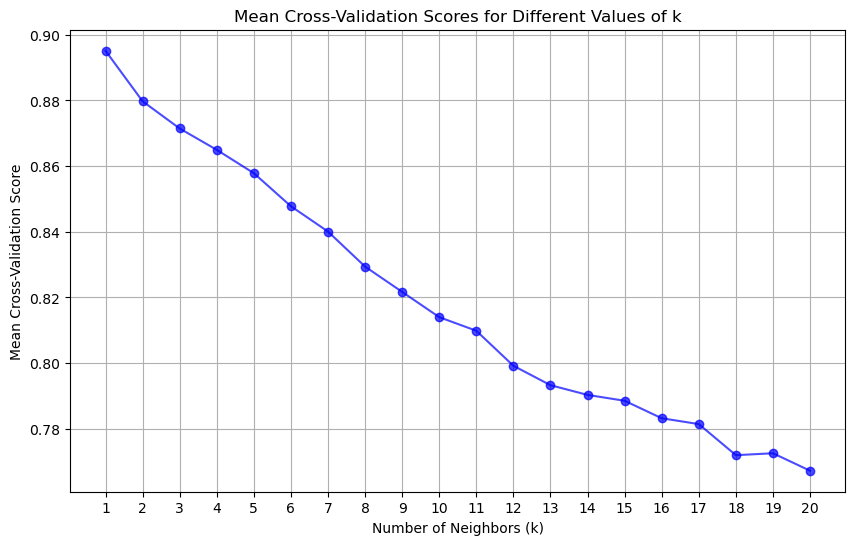

In [43]:
# Define a range of k values to test
k_values = range(1, 21)
all_scores = []

# Perform cross-validation for each k - encoded target variable non-scaled data
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_encoded, y_train_encoded, cv=5)  # 5-fold cross-validation
    all_scores.append(scores)

# Convert the list of scores to a NumPy array for easier manipulation
all_scores = np.array(all_scores)

# Calculate mean scores for each k
mean_scores = all_scores.mean(axis=1)

# Print k values and their corresponding mean scores
for k, mean_score in zip(k_values, mean_scores):
    print(f'k: {k}, Mean Score: {mean_score:.4f}')

# Plot the mean CV scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', color='blue', alpha=0.7)

plt.title('Mean Cross-Validation Scores for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(k_values)  # Show all k values on the x-axis
plt.grid()

# Save the plot as a PNG file
plt.savefig('plots/kNN/cross_validation_scores.png')

plt.show()

- The Cross Validation mean score decreases as k values increases. Using more neighbours may lead to a less accurate model.
- Highest mean at k = 1, however it is a too low k and might lead to overfitting, while high value of k may lead to underfitting.
- Use a value of k that is not too small and not too big.

##### Model accuracy

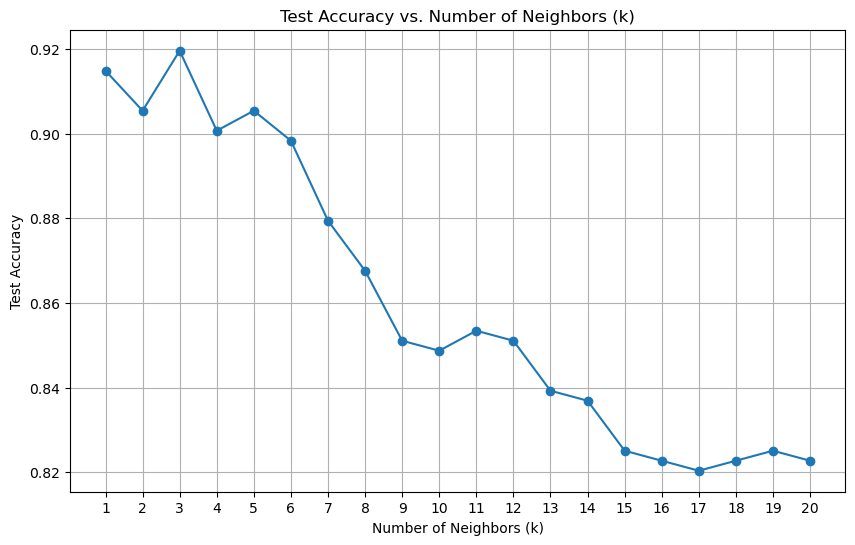

In [46]:

# Define a range of k values (number of neighbors)
k_values = range(1, 21)  # k values from 1 to 20

# List to store the test accuracy for each k
test_accuracies = []

# Loop through each k, train the KNN model, and evaluate it on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the training data
    knn.fit(X_train_encoded, y_train_encoded)
    
    # Predict on the test data
    y_pred = knn.predict(X_test_encoded)
    
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test_encoded, y_pred)
    
    # Store the test accuracy
    test_accuracies.append(test_accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'test_accuracy': test_accuracies
})

# Plotting the test accuracy against k values
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['test_accuracy'], marker='o')
plt.title('Test Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')

# Convert k values to integers for x-ticks
plt.xticks(results_df['k'].astype(int))  # Show all k values on the x-axis
plt.grid()
plt.savefig('plots/kNN/kNN_test_accuracy.png')

- Based on the CV mean score and Test accuracy plot high k has low CV and test accuracy and low k has better CV and test accuracy.
- In the test accuracy plot, 𝑘=3 or k=4 seems to provide the highest accuracy. However, in the cross-validation score plot.
- Check the test accuracy of k between 3 and 7 to identify the best k based on the highest accuracy.

In [48]:
#Check model performance for encoded y (non-scaled data) for different k values

# Define the range of k values - k between 3 and 7
k_values = range(3, 8)

# Store the accuracy for each k
test_accuracies = []

for k in k_values:
    # Initialize KNN with the current k
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model to the training data
    clf.fit(X_train_encoded, y_train_encoded)
    
    # Predict on the test data
    y_pred = clf.predict(X_test_encoded)
    
    # Calculate the accuracy of the test data
    accuracy = accuracy_score(y_test_encoded, y_pred)
    
    # Append the accuracy to the list
    test_accuracies.append((k, accuracy))
    
    # Print the accuracy for the current k
    print(f"k: {k}, Test Accuracy: {accuracy:.4f}")

# Find the best k based on test accuracy
best_k, best_accuracy = max(test_accuracies, key=lambda x: x[1])
print(f"\nBest k based on test accuracy: {best_k} with accuracy - encoded y/non scaled data: {best_accuracy:.4f}")


k: 3, Test Accuracy: 0.9196
k: 4, Test Accuracy: 0.9007
k: 5, Test Accuracy: 0.9054
k: 6, Test Accuracy: 0.8983
k: 7, Test Accuracy: 0.8794

Best k based on test accuracy: 3 with accuracy - encoded y/non scaled data: 0.9196


- Best test accuracy is k  = 3 for encoded y(target variable) /non scaled data.

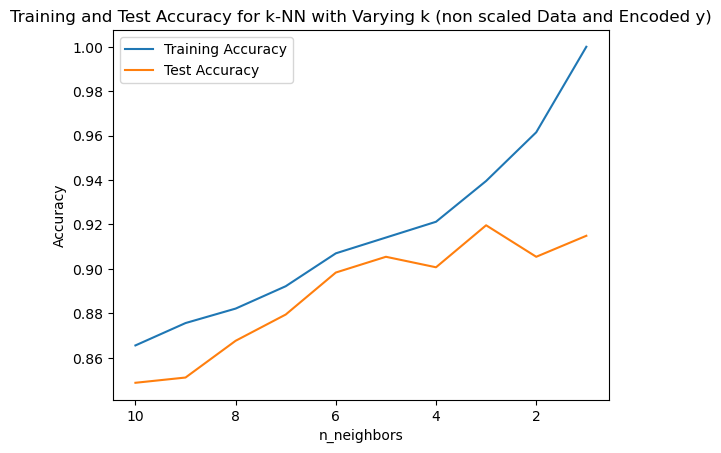

In [50]:
#Plot the training accuracy vs Test accuracy for encoded y non-scaled data

# Lists to store the accuracies
training_accuracy = []
test_accuracy = []
neighbours = range(1, 11)

for k in neighbours:
    # Build the model
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_encoded, y_train_encoded)
    
    # Record training set accuracy
    training_accuracy.append(clf.score(X_train_encoded, y_train_encoded))
    
    # Record test set accuracy
    test_accuracy.append(clf.score(X_test_encoded, y_test_encoded))

# Plotting the results
plt.plot(neighbours, training_accuracy, label="Training Accuracy")
plt.plot(neighbours, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.title('Training and Test Accuracy for k-NN with Varying k (non scaled Data and Encoded y)')
ax = plt.gca()
ax.invert_xaxis()
plt.savefig('plots/kNN/kNN_training_test_accuracies.png')
plt.show()

- The best k was previously checked and k of 3 got the highest performance.
- Looking at the training vs the test, 3 seems to be the highest.
- At k=3, the model appears to have a good balance between training and test performance.
- Is k=3 too low? Check the Confusion Matrix for k=3, k=4, k=5 to determine the best k.

##### Confusion Matrix

In [53]:
#Check k of 3, 4 and 5 - encoded y and non-scaled data
clf3 = KNeighborsClassifier(n_neighbors=3)    
clf3.fit(X_train_encoded, y_train_encoded)

# yPredict = clf.predict(X_test)
# print(accuracy_score(y_test, yPredict))
print('Test Accuracy - k of 3: ', clf3.score(X_test_encoded, y_test_encoded))

clf4 = KNeighborsClassifier(n_neighbors=4)    
clf4.fit(X_train_encoded, y_train_encoded)

# yPredict = clf.predict(X_test)
# print(accuracy_score(y_test, yPredict))
print('Test Accuracy - k of 4: ', clf4.score(X_test_encoded, y_test_encoded))

clf5 = KNeighborsClassifier(n_neighbors=5)    
clf5.fit(X_train_encoded, y_train_encoded)

# yPredict = clf.predict(X_test)
# print(accuracy_score(y_test, yPredict))
print('Test Accuracy - k of 5: ', clf5.score(X_test_encoded, y_test_encoded))

Test Accuracy - k of 3:  0.9196217494089834
Test Accuracy - k of 4:  0.900709219858156
Test Accuracy - k of 5:  0.9054373522458629


- k of 4 and 5 : very similar test accuracy

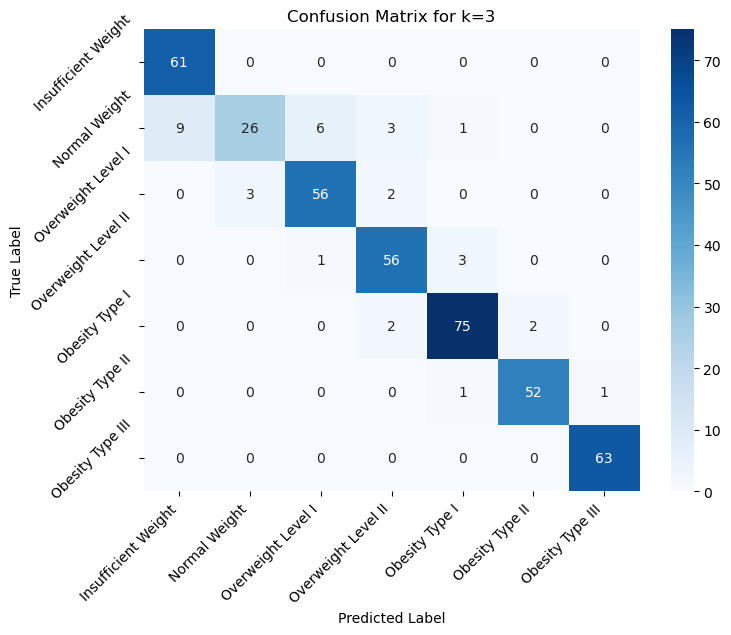

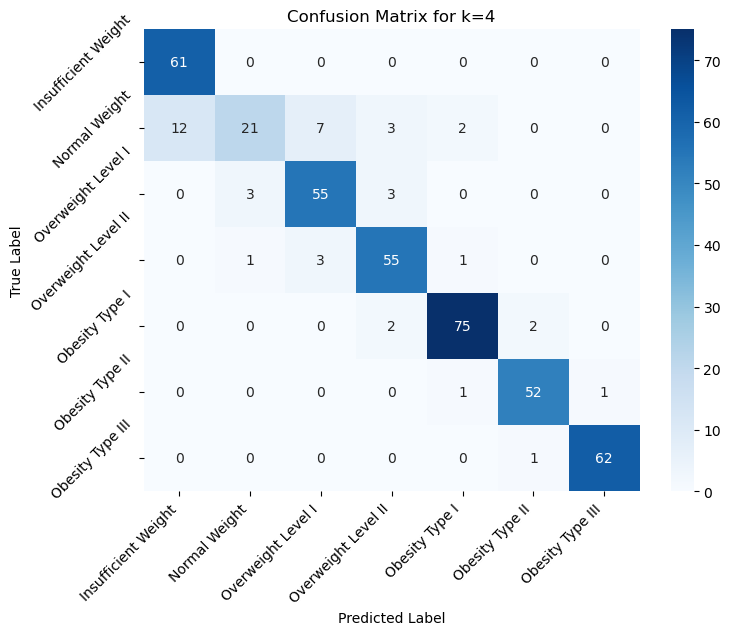

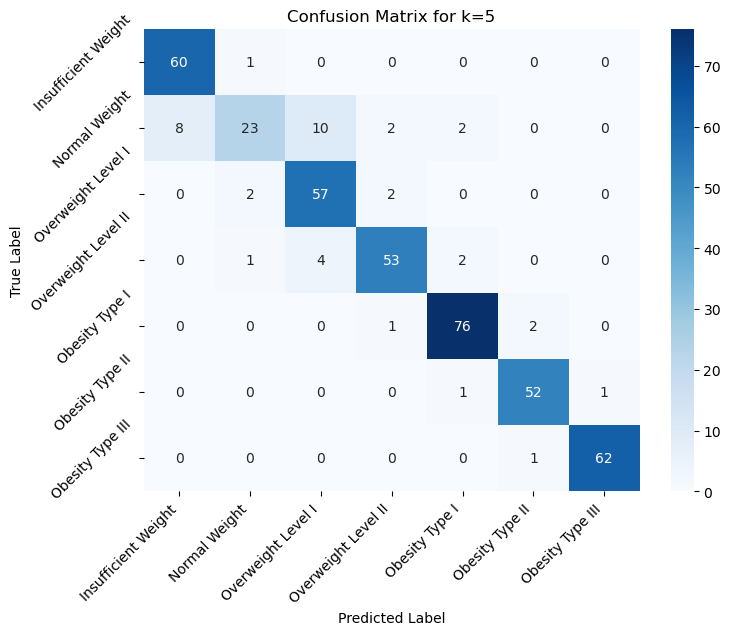

In [55]:
#Plot cm for k of 3, 4 and k of 5
y_pred_k3 = clf3.predict(X_test_encoded)

# Define class names based on your target order mapping
class_names = ['Insufficient Weight', 'Normal Weight', 'Overweight Level I', 
               'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III']
# Generate the confusion matrix for k=3
conf_matrix_k3 = confusion_matrix(y_test_encoded, y_pred_k3)

# Plot the confusion matrix for k=3 as before
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_k3, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)#replace the labels with the names instead of integers (encoded as it is ordinal type)
plt.title('Confusion Matrix for k=3')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')#to make it easier to read the labels
plt.yticks(rotation=45)#to make it easier to read the labels
plt.savefig('plots/kNN/kNN_cm_k3.png')
plt.show()

print()
print()

y_pred_k4 = clf4.predict(X_test_encoded)

# Define class names based on your target order mapping
class_names = ['Insufficient Weight', 'Normal Weight', 'Overweight Level I', 
               'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III']
# Generate the confusion matrix for k=4
conf_matrix_k4 = confusion_matrix(y_test_encoded, y_pred_k4)

# Plot the confusion matrix for k=4 as before
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_k4, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)#replace the labels with the names instead of integers (encoded as it is ordinal type)
plt.title('Confusion Matrix for k=4')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')#to make it easier to read the labels
plt.yticks(rotation=45)#to make it easier to read the labels
plt.savefig('plots/kNN/kNN_cm_k4.png')
plt.show()

print()
print()
 
clf5.fit(X_train_encoded, y_train_encoded)
y_pred_k5 = clf5.predict(X_test_encoded)

# Generate the confusion matrix for k=4
conf_matrix_k5 = confusion_matrix(y_test_encoded, y_pred_k5)

# Plot the confusion matrix for k=4 as before
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_k5, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)#replace the labels with the names instead of integers (encoded as it is ordinal type)
plt.title('Confusion Matrix for k=5')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')#to make it easier to read the labels
plt.yticks(rotation=45)#to make it easier to read the labels
plt.savefig('plots/kNN/kNN_cm_k5.png')
plt.show()

- k=3 shows the highest accuracy with fewer misclassifications across most categories.
- k=3 offers the best balance of accuracy across all classes.
- k=3: while there are still some misclassifications, particularly for "Normal Weight," the overall performance across all weight classes is the best when compared to k=4 and k=5.

## The end